<a href="https://colab.research.google.com/github/estella123wang/Dissertation2020/blob/master/misclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/9.6/')
!ls

high_ttd.csv  low_ttd.csv  prot_denoised_new.csv  prt.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
low_ttd = pd.read_csv("low_ttd.csv")

temp = low_ttd[['storage_time','age.sample','tsq_smoking','smok_duration','smok_intensity','packyears', 'CSI','ttd', 'bmi']]

temp.fillna((temp.mean()), inplace=True)
temp.isna().sum()

X = temp
y = low_ttd.iloc[:,93]

from sklearn.model_selection import train_test_split

#train:test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

GNB_clf = GaussianNB()
dt_clf = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators = 100)
logmodel = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 5)
svmclf = svm.SVC()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "SVM": svmclf,
          "Bagging": bag_clf}

scores = {}

for key,value in models.items():
  model = value
  model.fit(X_train,y_train)
  scores[key] = 1-model.score(X_test, y_test)

scores_frame = pd.DataFrame(scores, index = ["Misclassification score"]).T
scores_frame

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Misclassification score
Gussian Naive Bayes,0.367347
Decision tree,0.408163
Random forest,0.244898
Logistic regression,0.551020
k-NN,0.326531
SVM,0.571429
Bagging,0.265306


In [ ]:
['Gussian Naive Bayes', 'Decision tree', 'Random forest', 'Logistic regression', 'k-NN','SVM','Bagging']
[0.37,0.41,0.24,0.55,0.33,0.57,0.27]

[0.37, 0.41, 0.24, 0.55, 0.33, 0.57, 0.27]

Gussian Naive Bayes
Decision tree
Random forest


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic regression
k-NN
Bagging


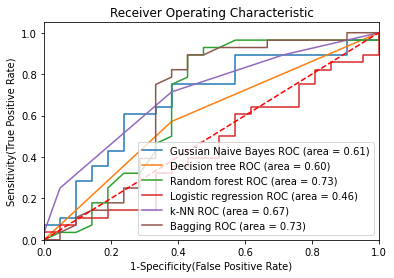

In [ ]:
plt.figure()

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "Bagging": bag_clf}

# Add the models to the list that you want to view on the ROC plot


# Below for loop iterates through your models list
for key,value in models.items():
    model = value # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    print(key)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (key, auc))


# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [ ]:
scores

{'Bagging': 0.26530612244897955,
 'Decision tree': 0.3877551020408163,
 'Gussian Naive Bayes': 0.36734693877551017,
 'Logistic regression': 0.5510204081632653,
 'Random forest': 0.22448979591836737,
 'SVM': 0.5714285714285714,
 'k-NN': 0.326530612244898}

In [ ]:
[0.2653,0.3878,0.3673,0.5510,0.2245,0.5714,0.3265]

In [ ]:
x = ['Gussian Naive Bayes', 'Decision tree', 'Random forest', 'Logistic regression', 'k-NN','SVM','Bagging']
y = [0.3673,0.367347,0.367347,0.551020,0.551020,0.5714,0.2449]

plt.barh(x, y)
ax.yaxis.grid(color='gray', linestyle='dashed')

for index, value in enumerate(y):
plt.text(value, index, str(value))

In [ ]:
high_ttd = pd.read_csv("high_ttd.csv")

temp = high_ttd[['storage_time','age.sample','tsq_smoking','smok_duration','smok_intensity','packyears', 'CSI','ttd', 'bmi']]

temp.fillna((temp.mean()), inplace=True)
temp.isna().sum()

X = temp
y = high_ttd.iloc[:,93]

from sklearn.model_selection import train_test_split

#train:test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

GNB_clf = GaussianNB()
dt_clf = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators = 100)
logmodel = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 5)
svmclf = svm.SVC()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "SVM": svmclf,
          "Bagging": bag_clf}

scores = {}

for key,value in models.items():
  model = value
  model.fit(X_train,y_train)
  scores[key] = 1-model.score(X_test, y_test)

scores_frame = pd.DataFrame(scores, index = ["Misclassification score"]).T
scores_frame

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Misclassification score
Gussian Naive Bayes,0.367347
Decision tree,0.551020
Random forest,0.510204
Logistic regression,0.387755
k-NN,0.489796
SVM,0.428571
Bagging,0.510204


Gussian Naive Bayes
Decision tree
Random forest


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic regression
k-NN
Bagging


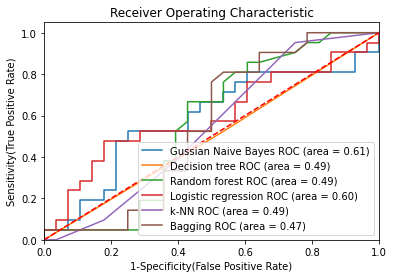

In [ ]:
plt.figure()

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "Bagging": bag_clf}

# Add the models to the list that you want to view on the ROC plot


# Below for loop iterates through your models list
for key,value in models.items():
    model = value # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    print(key)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (key, auc))


# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [ ]:
scores

{'Bagging': 0.5102040816326531,
 'Decision tree': 0.5102040816326531,
 'Gussian Naive Bayes': 0.36734693877551017,
 'Logistic regression': 0.3877551020408163,
 'Random forest': 0.5306122448979591,
 'SVM': 0.4285714285714286,
 'k-NN': 0.4897959183673469}

In [ ]:
[0.5102,0.5102,0.3673,0.3877,0.5306,0.4286,0.49]

In [ ]:
prt_ttd = pd.read_csv("prt.csv")

temp = prt_ttd[['storage_time','age.sample','tsq_smoking','smok_duration','smok_intensity','packyears', 'CSI','ttd', 'bmi']]

temp.fillna((temp.mean()), inplace=True)
temp.isna().sum()

X = temp
y = prt_ttd.iloc[:,93]

from sklearn.model_selection import train_test_split

#train:test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

GNB_clf = GaussianNB()
dt_clf = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators = 100)
logmodel = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 5)
svmclf = svm.SVC()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "SVM": svmclf,
          "Bagging": bag_clf}

scores = {}

for key,value in models.items():
  model = value
  model.fit(X_train,y_train)
  scores[key] = 1-model.score(X_test, y_test)

scores_frame = pd.DataFrame(scores, index = ["Misclassification score"]).T
scores_frame

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Misclassification score
Gussian Naive Bayes,0.492308
Decision tree,0.548718
Random forest,0.528205
Logistic regression,0.507692
k-NN,0.523077
SVM,0.538462
Bagging,0.564103


In [ ]:
['Gussian Naive Bayes', 'Decision tree', 'Random forest', 'Logistic regression', 'k-NN','SVM','Bagging']
[0.49,0.55,0.53,0.51,0.52,0.54,0.56]

Gussian Naive Bayes
Decision tree
Random forest
Logistic regression
k-NN
Bagging


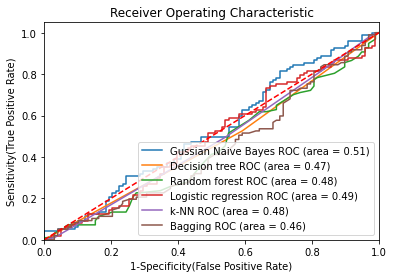

In [ ]:
plt.figure()

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "Bagging": bag_clf}

# Add the models to the list that you want to view on the ROC plot


# Below for loop iterates through your models list
for key,value in models.items():
    model = value # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    print(key)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (key, auc))


# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [ ]:
scores

{'Bagging': 0.5743589743589743,
 'Decision tree': 0.5282051282051282,
 'Gussian Naive Bayes': 0.49230769230769234,
 'Logistic regression': 0.5076923076923077,
 'Random forest': 0.5487179487179488,
 'SVM': 0.5384615384615384,
 'k-NN': 0.523076923076923}

In [ ]:
[0.5745,0.5282,0.4923,0.5077,0.5487,0.5385,0.5231]
['Bagging','Decision tree','Gussian Naive Bayes','Logistic regression','Random forest','SVM','k-NN']

[0.5745, 0.5282, 0.4923, 0.5077, 0.5487, 0.5385, 0.5231]

In [ ]:
high_ttd = pd.read_csv("high_ttd.csv")

temp = high_ttd[['storage_time','age.sample','tsq_smoking','smok_duration','smok_intensity','packyears', 'CSI','ttd', 'bmi']]

temp.fillna((temp.mean()), inplace=True)
temp.isna().sum()

X = temp
y = high_ttd.iloc[:,93]

from sklearn.model_selection import train_test_split

#train:test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

GNB_clf = GaussianNB()
dt_clf = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators = 100)
logmodel = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 5)
svmclf = svm.SVC()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

models = {"Gussian Naive Bayes": GNB_clf,
          "Decision tree": dt_clf,
          "Random forest": ran,
          "Logistic regression": logmodel,
          "k-NN": knn_clf,
          "SVM": svmclf,
          "Bagging": bag_clf}

scores = {}

for key,value in models.items():
  model = value
  model.fit(X_train,y_train)
  scores[key] = 1-model.score(X_test, y_test)

scores_frame = pd.DataFrame(scores, index = ["Misclassification score"]).T
scores_frame

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Misclassification score
Gussian Naive Bayes,0.367347
Decision tree,0.510204
Random forest,0.489796
Logistic regression,0.387755
k-NN,0.489796
SVM,0.428571
Bagging,0.469388


In [ ]:
['Gussian Naive Bayes', 'Decision tree', 'Random forest', 'Logistic regression', 'k-NN','SVM','Bagging']
[0.37,0.51,0.49,0.39,0.49,0.43,0.47]

In [ ]:
scoresname = {}

for key,value in scores_frame.items():
  model = value
  scores[key] = 1-model.score(X_test, y_test)

Index(['Misclassification score'], dtype='object')

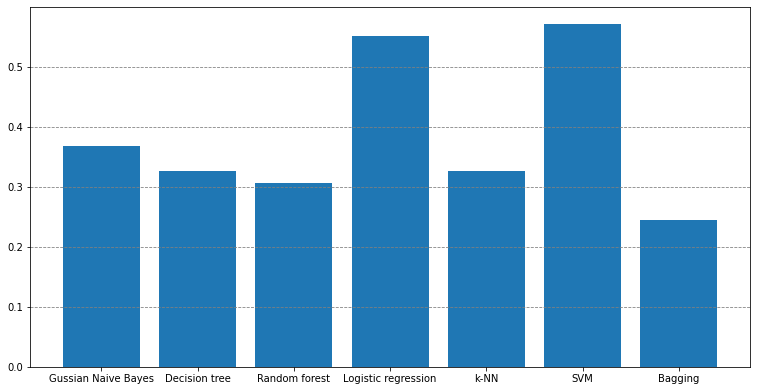

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
modelnames = ['Gussian Naive Bayes', 'Decision tree', 'Random forest', 'Logistic regression', 'k-NN','SVM','Bagging']
scores = [0.3673,0.3265,0.3061,0.5510,0.3265,0.5714,0.2449]
ax.bar(modelnames,scores)
ax.yaxis.grid(color='gray', linestyle='dashed')
fig.set_size_inches(10, 5, forward=True)
plt.show()

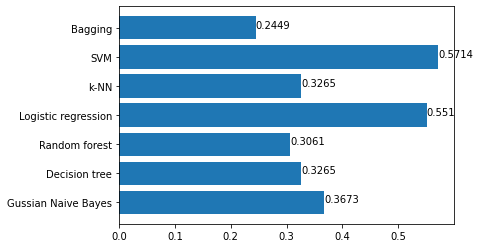

In [ ]:
x = ['Gussian Naive Bayes', 'Decision tree', 'Random forest', 'Logistic regression', 'k-NN','SVM','Bagging']
y = [0.3673,0.3265,0.3061,0.5510,0.3265,0.5714,0.2449]

plt.barh(x, y)
ax.yaxis.grid(color='gray', linestyle='dashed')

for index, value in enumerate(y):
plt.text(value, index, str(value))

<Figure size 432x864 with 0 Axes>

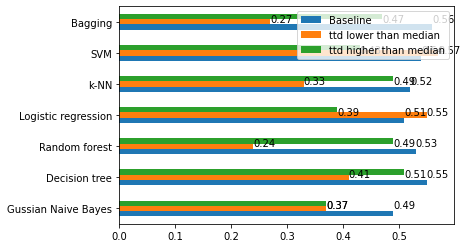

In [ ]:
baseline = [0.49,0.55,0.53,0.51,0.52,0.54,0.56]
low = [0.37,0.41,0.24,0.55,0.33,0.57,0.27]
high = [0.37,0.51,0.49,0.39,0.49,0.43,0.47]
index = ['Gussian Naive Bayes', 'Decision tree', 'Random forest', 'Logistic regression', 'k-NN','SVM','Bagging']
df = pd.DataFrame({'Baseline': baseline,'ttd lower than median': low,'ttd higher than median': high}, index=index)
plt.figure(figsize = (6,12))
ax.yaxis.grid(color='gray', linestyle='dashed')
ax = df.plot.barh()

for index, value in enumerate(low):
  plt.text(value, index, str(value))

for index, value in enumerate(high):
  plt.text(value, index, str(value))

for index, value in enumerate(baseline):
  plt.text(value, index, str(value))

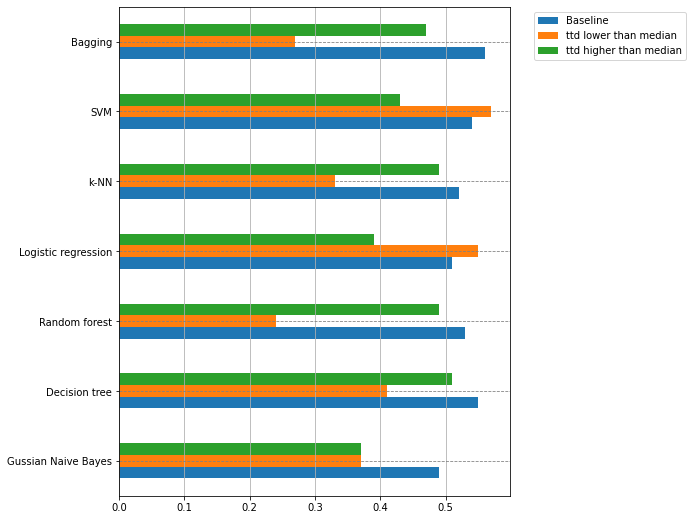

In [ ]:
baseline = [0.49,0.55,0.53,0.51,0.52,0.54,0.56]
low = [0.37,0.41,0.24,0.55,0.33,0.57,0.27]
high = [0.37,0.51,0.49,0.39,0.49,0.43,0.47]
index = ['Gussian Naive Bayes', 'Decision tree', 'Random forest', 'Logistic regression', 'k-NN','SVM','Bagging']
df = pd.DataFrame({'Baseline': baseline,'ttd lower than median': low,'ttd higher than median': high}, index=index)

fig, ax = plt.subplots(figsize=(7, 9))
ax.yaxis.grid(color='gray', linestyle='dashed')
df.plot.barh(ax=ax)  # ax=ax lets the dataframe plot use the subplot axes
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # place the legend outside
plt.grid()  # show the grid

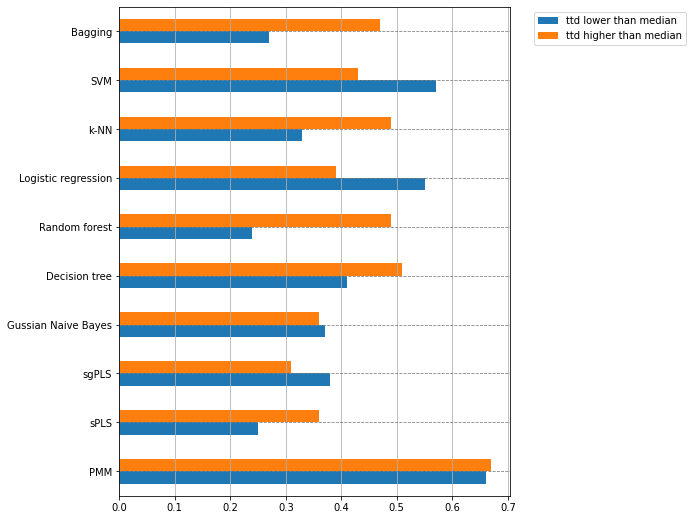

In [ ]:
low = [0.66,0.25,0.38,0.37,0.41,0.24,0.55,0.33,0.57,0.27]
high = [0.67,0.36,0.31,0.36,0.51,0.49,0.39,0.49,0.43,0.47]
index = ['PMM','sPLS','sgPLS','Gussian Naive Bayes', 'Decision tree', 'Random forest', 'Logistic regression', 'k-NN','SVM','Bagging']
df = pd.DataFrame({'ttd lower than median': low,'ttd higher than median': high}, index=index)

fig, ax = plt.subplots(figsize=(7, 9))
ax.yaxis.grid(color='gray', linestyle='dashed')
df.plot.barh(ax=ax)  # ax=ax lets the dataframe plot use the subplot axes
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # place the legend outside
plt.grid()  # show the grid